In [1]:
# Import required libraries
import requests
from bs4 import BeautifulSoup

# URL of the site to scrape
url = 'http://books.toscrape.com/'

# Get the page content
response = requests.get(url)
if response.status_code == 200:
    print("Successfully fetched the page!")
else:
    print("Failed to retrieve the page")

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Let's look at the title of the page
print("Page title:", soup.title.string)


Successfully fetched the page!
Page title: 
    All products | Books to Scrape - Sandbox



In [2]:
# Find all book containers on the page
books = soup.find_all('article', class_='product_pod')

print(f"Found {len(books)} books on the page.\n")

# Loop through each book and extract title and price
for book in books:
    # Title is in the 'alt' attribute of the image tag
    title = book.find('h3').find('a')['title']
    
    # Price is inside <p class="price_color">
    price = book.find('p', class_='price_color').text
    
    print(f"Title: {title}")
    print(f"Price: {price}")
    print("-" * 40)


Found 20 books on the page.

Title: A Light in the Attic
Price: Â£51.77
----------------------------------------
Title: Tipping the Velvet
Price: Â£53.74
----------------------------------------
Title: Soumission
Price: Â£50.10
----------------------------------------
Title: Sharp Objects
Price: Â£47.82
----------------------------------------
Title: Sapiens: A Brief History of Humankind
Price: Â£54.23
----------------------------------------
Title: The Requiem Red
Price: Â£22.65
----------------------------------------
Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34
----------------------------------------
Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93
----------------------------------------
Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: Â£22.60
----------------------------------------
Title: The Black Maria
Price: Â£52.15
-------------

In [3]:
import csv

# Open a CSV file to write data
with open('books.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price'])  # Header row
    
    for book in books:
        title = book.find('h3').find('a')['title']
        price = book.find('p', class_='price_color').text
        writer.writerow([title, price])

print("Data saved to books.csv")


Data saved to books.csv


In [4]:
import requests
from bs4 import BeautifulSoup
import csv

base_url = 'http://books.toscrape.com/catalogue/page-{}.html'
books = []

for page_num in range(1, 51):  # 50 pages total
    print(f"Scraping page {page_num}...")
    url = base_url.format(page_num)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    books_on_page = soup.find_all('article', class_='product_pod')
    for book in books_on_page:
        title = book.find('h3').find('a')['title']
        price = book.find('p', class_='price_color').text
        books.append([title, price])

# Save all books to CSV
with open('all_books.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price'])
    writer.writerows(books)

print("All pages scraped and data saved to all_books.csv")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
All pages

In [5]:
import requests
from bs4 import BeautifulSoup
import csv

base_url = 'http://books.toscrape.com/catalogue/page-{}.html'
books = []

for page_num in range(1, 51):
    print(f"Scraping page {page_num}...")
    url = base_url.format(page_num)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    books_on_page = soup.find_all('article', class_='product_pod')
    for book in books_on_page:
        title = book.find('h3').find('a')['title']
        price = book.find('p', class_='price_color').text
        
        # Rating is stored in class name, e.g., 'star-rating Three'
        rating_class = book.find('p', class_='star-rating')['class']
        # The rating word is the second class (e.g., 'Three')
        rating = rating_class[1]
        
        availability = book.find('p', class_='instock availability').text.strip()
        
        # Partial link to product page
        product_page = book.find('h3').find('a')['href']
        # Build full URL
        product_url = 'http://books.toscrape.com/catalogue/' + product_page
        
        books.append([title, price, rating, availability, product_url])

# Save to CSV
with open('all_books_detailed.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price', 'Rating', 'Availability', 'Product URL'])
    writer.writerows(books)

print("Detailed data scraped and saved to all_books_detailed.csv")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Detailed 

In [6]:
import requests
from bs4 import BeautifulSoup
import csv
import time

def scrape_book_details(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Product description - inside #product_description + next sibling <p>
    desc_heading = soup.find(id='product_description')
    if desc_heading:
        description = desc_heading.find_next_sibling('p').text.strip()
    else:
        description = "No description"
    
    # UPC - in the product info table (first row)
    table = soup.find('table', class_='table table-striped')
    upc = None
    category = None
    num_reviews = None
    if table:
        rows = table.find_all('tr')
        upc = rows[0].find('td').text.strip()  # First row, first column
        num_reviews = rows[-1].find('td').text.strip()  # Last row is reviews
    
    # Category - breadcrumb navigation (3rd li element)
    breadcrumb = soup.find('ul', class_='breadcrumb')
    if breadcrumb:
        categories = breadcrumb.find_all('li')
        if len(categories) > 2:
            category = categories[2].text.strip()
    
    return description, upc, category, num_reviews


# Load your existing CSV (or list of books)
books_with_details = []

with open('all_books_detailed.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        url = row['Product URL']
        print(f"Scraping details for: {row['Title']}")
        description, upc, category, num_reviews = scrape_book_details(url)
        
        books_with_details.append([
            row['Title'],
            row['Price'],
            row['Rating'],
            row['Availability'],
            url,
            description,
            upc,
            category,
            num_reviews
        ])
        time.sleep(1)  # be polite, avoid hammering server too fast

# Save extended data to a new CSV
with open('all_books_full.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price', 'Rating', 'Availability', 'Product URL', 'Description', 'UPC', 'Category', 'Number of Reviews'])
    writer.writerows(books_with_details)

print("Full book data with details saved to all_books_full.csv")


Scraping details for: A Light in the Attic
Scraping details for: Tipping the Velvet
Scraping details for: Soumission
Scraping details for: Sharp Objects
Scraping details for: Sapiens: A Brief History of Humankind
Scraping details for: The Requiem Red
Scraping details for: The Dirty Little Secrets of Getting Your Dream Job
Scraping details for: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Scraping details for: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Scraping details for: The Black Maria
Scraping details for: Starving Hearts (Triangular Trade Trilogy, #1)
Scraping details for: Shakespeare's Sonnets
Scraping details for: Set Me Free
Scraping details for: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Scraping details for: Rip it Up and Start Again
Scraping details for: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Scraping details for: Olio
Scrapi

In [7]:
import pandas as pd

df = pd.read_csv("all_books_full.csv")
df.head()


,Title,Price,Rating,Availability,Product URL,Description,UPC,Category,Number of Reviews
0,A Light in the Attic,£51.77,Three,In stock,http://books.toscrape.com/catalogue/a-light-in...,It's hard to imagine a world without A Light i...,a897fe39b1053632,Poetry,0
1,Tipping the Velvet,£53.74,One,In stock,http://books.toscrape.com/catalogue/tipping-th...,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Historical Fiction,0
2,Soumission,£50.10,One,In stock,http://books.toscrape.com/catalogue/soumission...,"Dans une France assez proche de la nôtre, un h...",6957f44c3847a760,Fiction,0
3,Sharp Objects,£47.82,Four,In stock,http://books.toscrape.com/catalogue/sharp-obje...,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Mystery,0
4,Sapiens: A Brief History of Humankind,£54.23,Five,In stock,http://books.toscrape.com/catalogue/sapiens-a-...,From a renowned historian comes a groundbreaki...,4165285e1663650f,History,0


In [9]:
# Clean Price column: remove any unwanted characters and convert to float
df['Price'] = df['Price'].str.replace('Â£', '', regex=False)  # clean old char
df['Price'] = df['Price'].str.replace('£', '', regex=False)   # clean pound symbol
df['Price'] = df['Price'].astype(float)


In [10]:
# Convert Ratings to numbers
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['Rating'] = df['Rating'].map(rating_map)

# Extract number from Availability
df['Availability'] = df['Availability'].str.extract(r'(\d+)').astype(float)

# Convert Number of Reviews to int
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

df.head()


,Title,Price,Rating,Availability,Product URL,Description,UPC,Category,Number of Reviews
0,A Light in the Attic,51.77,3,NaN,http://books.toscrape.com/catalogue/a-light-in...,It's hard to imagine a world without A Light i...,a897fe39b1053632,Poetry,0
1,Tipping the Velvet,53.74,1,NaN,http://books.toscrape.com/catalogue/tipping-th...,"""Erotic and absorbing...Written with starling ...",90fa61229261140a,Historical Fiction,0
2,Soumission,50.10,1,NaN,http://books.toscrape.com/catalogue/soumission...,"Dans une France assez proche de la nôtre, un h...",6957f44c3847a760,Fiction,0
3,Sharp Objects,47.82,4,NaN,http://books.toscrape.com/catalogue/sharp-obje...,"WICKED above her hipbone, GIRL across her hear...",e00eb4fd7b871a48,Mystery,0
4,Sapiens: A Brief History of Humankind,54.23,5,NaN,http://books.toscrape.com/catalogue/sapiens-a-...,From a renowned historian comes a groundbreaki...,4165285e1663650f,History,0


In [11]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



📚 Top 10 Most Expensive Books:
                                                 Title  Price
648                 The Perfect Play (Play by Play #1)  59.99
617                  Last One Home (New Beginnings #1)  59.98
860                   Civilization and Its Discontents  59.95
560                     The Barefoot Contessa Cookbook  59.92
366                          The Diary of a Young Girl  59.90
657  The Bone Hunters (Lexy Vaughan & Steven Macaul...  59.71
133  Thomas Jefferson and the Tripoli Pirates: The ...  59.64
387                      Boar Island (Anna Pigeon #19)  59.48
549  The Man Who Mistook His Wife for a Hat and Oth...  59.45
393                          The Improbability of Love  59.45

📊 Average Statistics:
Average Price: £ 35.07
Average Rating: 2.92
Average Number of Reviews: 0.0

🏷️ Top 10 Categories (by number of books):
Category
Default           152
Nonfiction        110
Sequential Art     75
Add a comment      67
Fiction            65
Young Adult        54
Fan

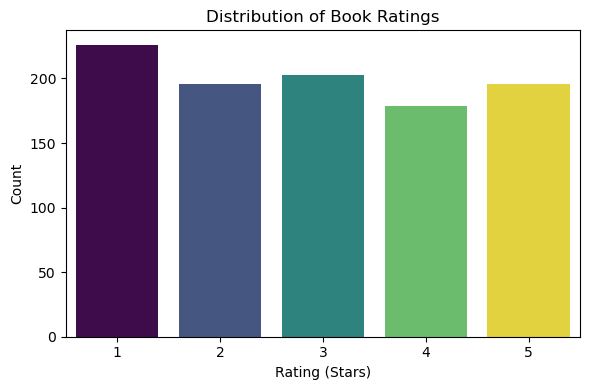

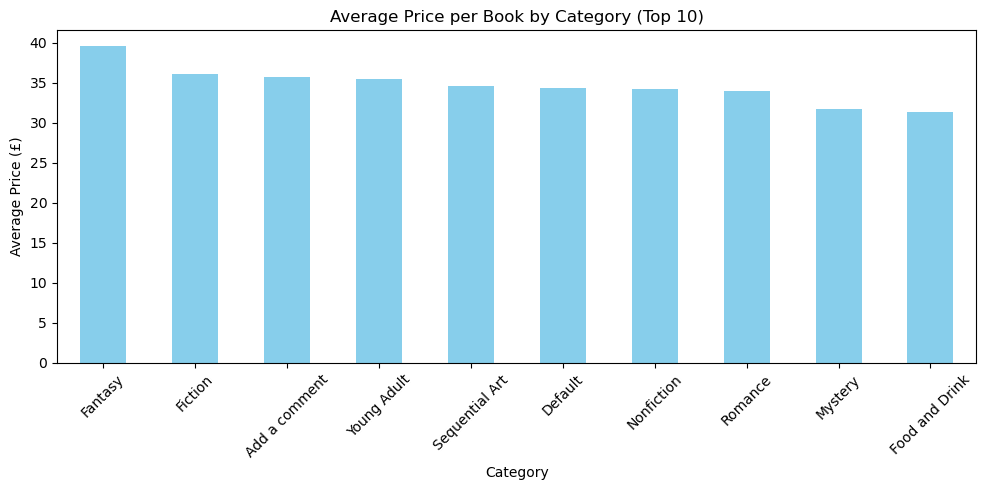

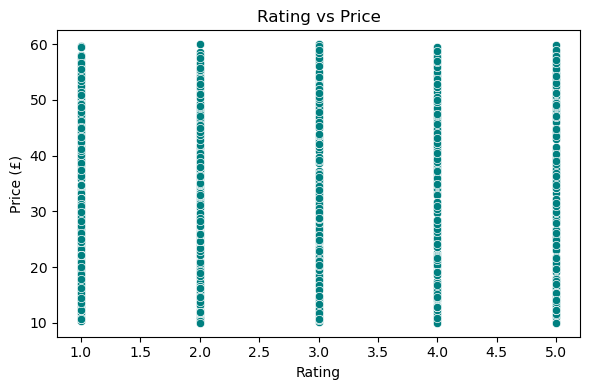

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("all_books_full.csv")

# Clean the Price column
df['Price'] = df['Price'].str.replace('£', '').astype(float)

# Convert Ratings from text to numeric
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['Rating'] = df['Rating'].map(rating_map)

# Convert Number of Reviews to numeric
df['Number of Reviews'] = pd.to_numeric(df['Number of Reviews'], errors='coerce')

# -------------------------------
# EDA Starts Here
# -------------------------------

# 1. Top 10 Most Expensive Books
print("\n📚 Top 10 Most Expensive Books:")
print(df.sort_values(by='Price', ascending=False)[['Title', 'Price']].head(10))

# 2. Average Stats
print("\n📊 Average Statistics:")
print("Average Price: £", round(df['Price'].mean(), 2))
print("Average Rating:", round(df['Rating'].mean(), 2))
print("Average Number of Reviews:", round(df['Number of Reviews'].mean(), 2))

# 3. Top 10 Categories by Book Count
print("\n🏷️ Top 10 Categories (by number of books):")
print(df['Category'].value_counts().head(10))

# 4. Distribution of Ratings
plt.figure(figsize=(6, 4))
sns.countplot(x='Rating', data=df, hue='Rating', palette='viridis', legend=False)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating (Stars)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 5. Average Price by Top 10 Categories
top_categories = df['Category'].value_counts().head(10).index
avg_price_by_cat = df[df['Category'].isin(top_categories)].groupby('Category')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_price_by_cat.plot(kind='bar', color='skyblue')
plt.title("Average Price per Book by Category (Top 10)")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Rating vs Price Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Rating', y='Price', data=df, color='teal')
plt.title("Rating vs Price")
plt.xlabel("Rating")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()


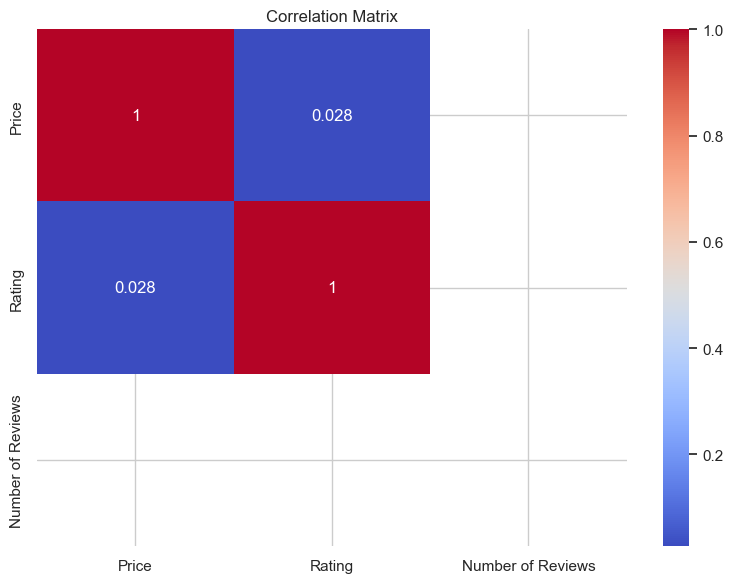

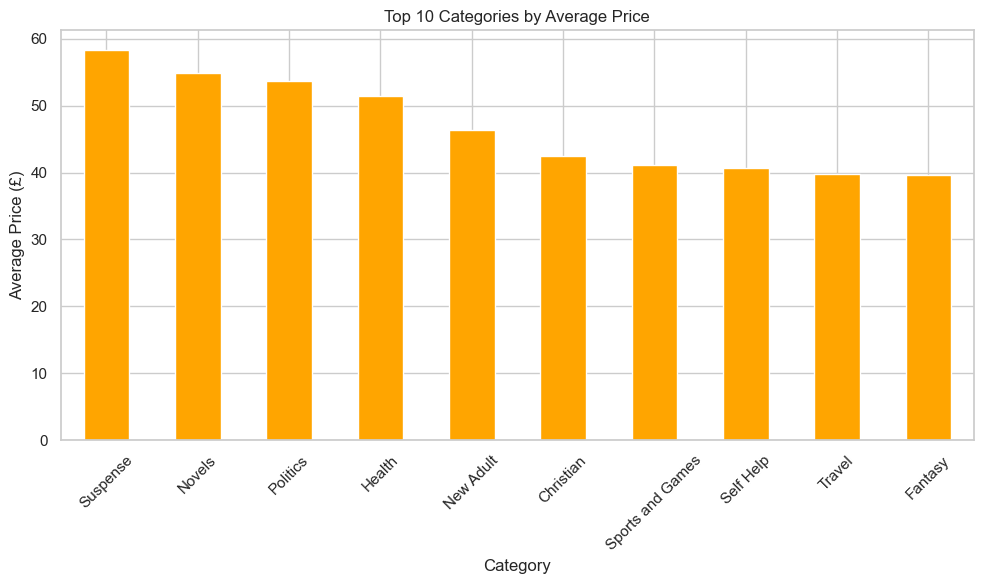

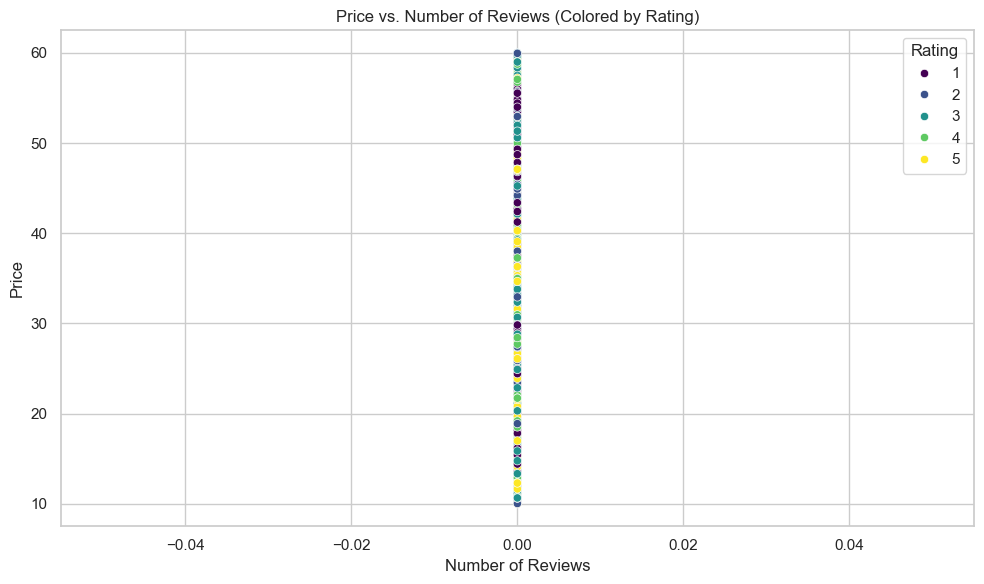

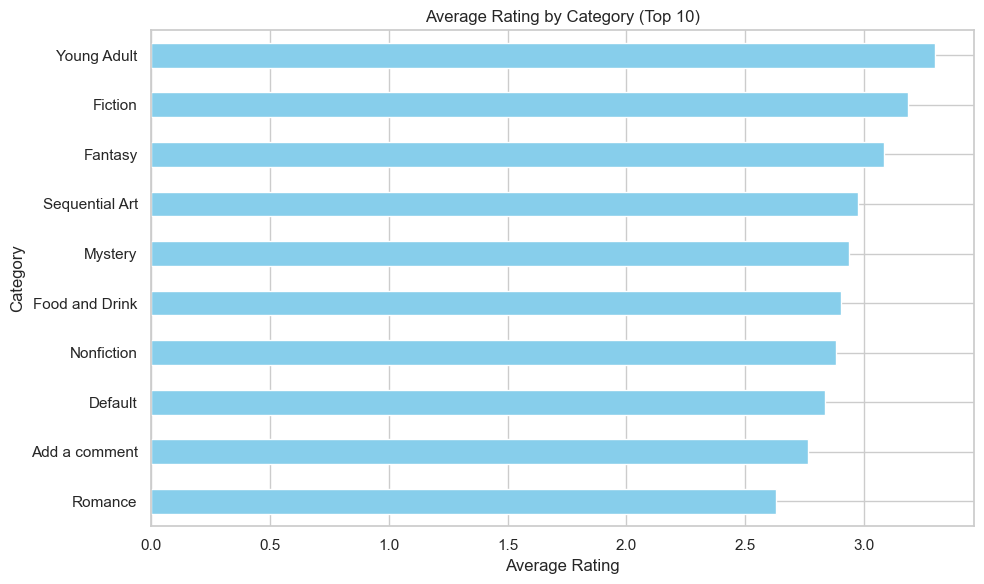

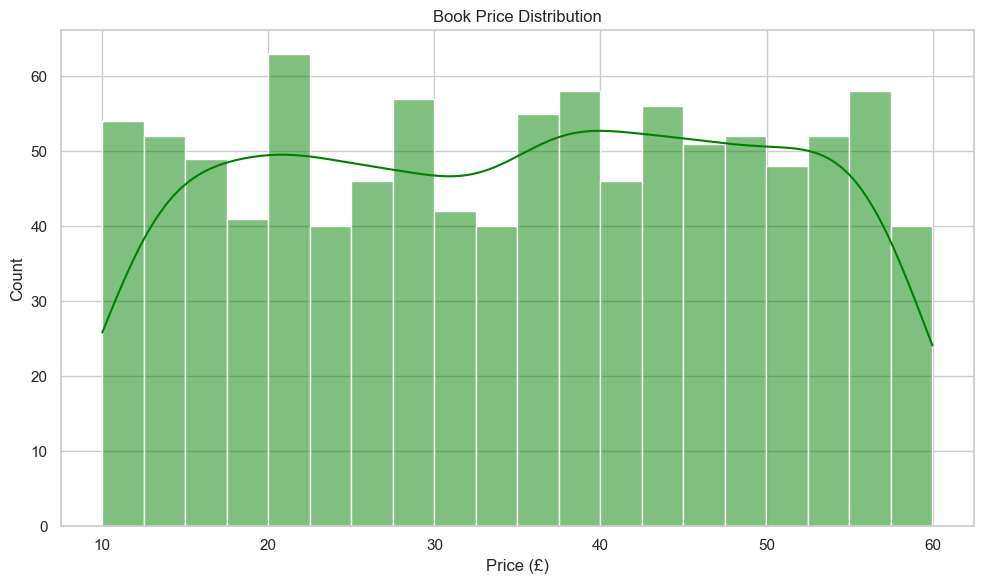

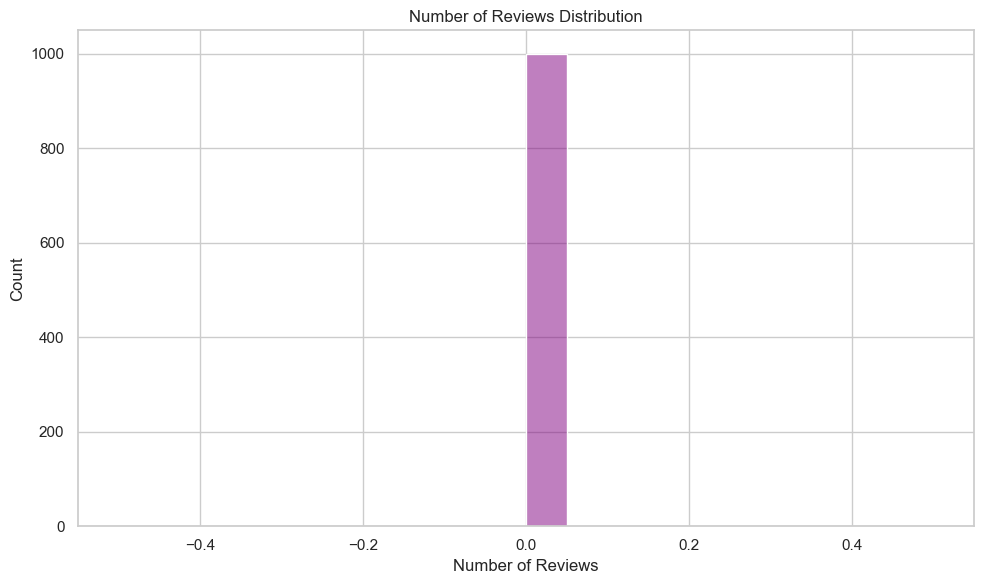

In [15]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create directory for saving plots if it doesn't exist
os.makedirs('plots', exist_ok=True)

# 1. Correlation Matrix
corr = df[['Price', 'Rating', 'Number of Reviews']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig('plots/correlation_matrix.png')
plt.show()

# Save correlation matrix as CSV
corr.to_csv('plots/correlation_matrix.csv')

# 2. Top 10 Categories by Average Price
avg_price_cat = df.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
avg_price_cat.plot(kind='bar', color='orange')
plt.title('Top 10 Categories by Average Price')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/top_categories_avg_price.png')
plt.show()

# Save average price per category as CSV
avg_price_cat.to_csv('plots/top_categories_avg_price.csv')

# 3. Scatterplot: Price vs. Number of Reviews
plt.figure(figsize=(10,6))
sns.scatterplot(x='Number of Reviews', y='Price', hue='Rating', data=df, palette='viridis')
plt.title('Price vs. Number of Reviews (Colored by Rating)')
plt.tight_layout()
plt.savefig('plots/price_vs_reviews_scatter.png')
plt.show()

# 4. Average Rating per Category (Top 10 categories by count)
top_cats = df['Category'].value_counts().head(10).index
avg_rating_cat = df[df['Category'].isin(top_cats)].groupby('Category')['Rating'].mean().sort_values()
plt.figure(figsize=(10,6))
avg_rating_cat.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Category (Top 10)')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.savefig('plots/avg_rating_by_category.png')
plt.show()

# Save average rating per category as CSV
avg_rating_cat.to_csv('plots/avg_rating_by_category.csv')

# 5. Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=20, kde=True, color='green')
plt.title('Book Price Distribution')
plt.xlabel('Price (£)')
plt.tight_layout()
plt.savefig('plots/price_distribution.png')
plt.show()

# 6. Review Count Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Number of Reviews'], bins=20, kde=True, color='purple')
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.savefig('plots/review_count_distribution.png')
plt.show()


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded and cleaned

# Optional: adjust plot style
sns.set(style="whitegrid")

# 1. Correlation Matrix
plt.figure(figsize=(10,6))
corr = df[['Price', 'Rating', 'Number of Reviews']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')
plt.close()

# 2. Top 10 Categories by Average Price
plt.figure(figsize=(10,6))
avg_price_cat = df.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)
avg_price_cat.plot(kind='bar', color='orange')
plt.title('Top 10 Categories by Average Price')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_price_by_category.png')
plt.close()

# 3. Scatterplot: Price vs. Number of Reviews
plt.figure(figsize=(10,6))
sns.scatterplot(x='Number of Reviews', y='Price', hue='Rating', data=df, palette='viridis')
plt.title('Price vs. Number of Reviews (Colored by Rating)')
plt.tight_layout()
plt.savefig('price_vs_reviews.png')
plt.close()

# 4. Average Rating per Category (Top 10 categories by count)
plt.figure(figsize=(10,6))
top_cats = df['Category'].value_counts().head(10).index
avg_rating_cat = df[df['Category'].isin(top_cats)].groupby('Category')['Rating'].mean().sort_values()
avg_rating_cat.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Category (Top 10)')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.savefig('avg_rating_by_category.png')
plt.close()

# 5. Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=20, kde=True, color='green')
plt.title('Book Price Distribution')
plt.xlabel('Price (£)')
plt.tight_layout()
plt.savefig('price_distribution.png')
plt.close()

# 6. Review Count Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Number of Reviews'], bins=20, kde=True, color='purple')
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.savefig('review_count_distribution.png')
plt.close()


In [17]:
pip install fpdf


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40714 sha256=f3c78cc34f1793a52cced96aea0151da172641e9955d54961cdf6d51d82c1e87
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [18]:
from fpdf import FPDF
import pandas as pd
import os

# Initialize PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

pdf.set_font("Arial", 'B', 16)
pdf.cell(0, 10, "Books Dataset Analysis Report", ln=True, align='C')

# Add Summary Statistics
pdf.set_font("Arial", 'B', 12)
pdf.cell(0, 10, "Summary Statistics", ln=True)

summary_stats = df[['Price', 'Rating', 'Number of Reviews']].describe().round(2)
pdf.set_font("Arial", '', 10)
for col in summary_stats.columns:
    pdf.cell(0, 8, f"{col}:", ln=True)
    for stat in summary_stats.index:
        pdf.cell(0, 6, f"  {stat}: {summary_stats.loc[stat, col]}", ln=True)
    pdf.ln(2)

# Helper to add image with title
def add_section(title, image_path, comment):
    pdf.add_page()
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(0, 10, title, ln=True)
    pdf.ln(5)
    if os.path.exists(image_path):
        pdf.image(image_path, w=180)
    pdf.ln(5)
    pdf.set_font("Arial", '', 11)
    pdf.multi_cell(0, 7, comment)

# Add each plot with commentary
add_section(
    "Correlation Matrix",
    "correlation_matrix.png",
    "This heatmap shows the correlation between Price, Rating, and Number of Reviews."
)

add_section(
    "Top 10 Categories by Average Price",
    "avg_price_by_category.png",
    "Bar chart illustrating the categories with the highest average book prices."
)

add_section(
    "Price vs. Number of Reviews",
    "price_vs_reviews.png",
    "Scatterplot showing the relationship between Price and Number of Reviews, colored by Rating."
)

add_section(
    "Average Rating by Category (Top 10)",
    "avg_rating_by_category.png",
    "Horizontal bar chart showing average ratings for the top 10 most frequent categories."
)

add_section(
    "Book Price Distribution",
    "price_distribution.png",
    "Distribution of book prices across the dataset."
)

add_section(
    "Number of Reviews Distribution",
    "review_count_distribution.png",
    "Distribution of the number of reviews received by books in the dataset."
)

# Save PDF
pdf.output("Books_Analysis_Report.pdf")

print("PDF report generated: Books_Analysis_Report.pdf")


PDF report generated: Books_Analysis_Report.pdf


In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Use Description or Title (if Description is missing, fallback to Title)
text = df['Description'].fillna(df['Title'])

# Target
y = np.log1p(df['Price'])

# TF-IDF + Ridge regression pipeline
model = make_pipeline(
    TfidfVectorizer(max_features=1000, stop_words='english'),
    Ridge()
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(text, y, test_size=0.2, random_state=42)

# Fit
model.fit(X_train, y_train)

# Predict
y_pred_log = model.predict(X_test)
y_test_true = np.expm1(y_test)
y_pred_true = np.expm1(y_pred_log)

# Evaluate
print("TF-IDF Ridge MSE:", mean_squared_error(y_test_true, y_pred_true))
print("TF-IDF Ridge R²:", r2_score(y_test_true, y_pred_true))


TF-IDF Ridge MSE: 250.7208988881223
TF-IDF Ridge R²: -0.1935477568392867
